In [2]:
import pandas as pd
import numpy as np
import re
import csv

# Read data from csv to dataframe and add parameter that will read in the following as nans:  'undefined', ' ', 'none', '-' 

hotel_bookings = pd.read_csv("hotel_bookings.csv").replace(['([uU]ndefined)', '/^(\S) &', '/^([nN]one)$', '/^(-)$'], np.nan, regex=True)



#Getting info on the column types

In [3]:
hotel_bookings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Update columns to the right dtype (reservation_status_date to datetime and is_canceled to bool)

In [4]:
hotel_bookings["reservation_status_date"] = pd.to_datetime(hotel_bookings["reservation_status_date"])
hotel_bookings["is_canceled"] = hotel_bookings["is_canceled"].astype('bool')

Checking that columns changed type successfully

In [5]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  bool          
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#In a new column named 'arrival_date', connect the year, month and day of month to one neat datetime
Then drop the year month and day column

In [6]:
from datetime import datetime

cols = ["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"]

hotel_bookings['arrival_date'] = hotel_bookings[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)

hotel_bookings['arrival_date'] = pd.to_datetime(hotel_bookings["reservation_status_date"])

hotel_bookings.drop(["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis=1, inplace=True)



In a new col named 'direct_booking' fill with 'yes' if agent  and company are NaN values, else fill with no.
Do this using a lambda


In [7]:
hotel_bookings['direct_booking'] = hotel_bookings[["agent", "company"]].apply(lambda x: "yes" if (pd.isnull(x[0]) and pd.isnull(x[1]))  else 'no', axis=1)

Checking that above code worked

In [8]:
hotel_bookings.loc[:, ["agent", "company", "direct_booking"]].head(20)

,agent,company,direct_booking
0,NaN,NaN,yes
1,NaN,NaN,yes
2,NaN,NaN,yes
3,304.0,NaN,no
4,240.0,NaN,no
5,240.0,NaN,no
6,NaN,NaN,yes
7,303.0,NaN,no
8,240.0,NaN,no
9,15.0,NaN,no


#Check which columns have nans. 

In [9]:
hotel_bookings.isna().any()[lambda x: x]


children                True
meal                    True
country                 True
market_segment          True
distribution_channel    True
agent                   True
company                 True
dtype: bool

Checking which nan values have significance, and which are actually Nan
   Children - NaN means zero children.  Will switch value to 0
   meal - Nan means no meal booked.  Will switch to "SC"
   country - Country of origin.  Nan means unknown
   market_segment - ?
   distribution_channel - ?
   agent - NaN means not booked through an agent.  Will switch to 0.00
   company - Nan means not booked through a company.  Will switch to 0.00 -->
   customer_type - NaN means unknown
   reservation_status - NaN means unknown
   reservation_status_date - NaN means unknown




   children - NaN means zero children.  Will switch value to 0
   meal - Nan means no meal booked.  Will switch to "SC"
   agent - NaN means not booked through an agent.  Will switch to 0.00
   company - Nan means not booked through a company.  Will switch to 0.00

In [10]:
hotel_bookings['children'].fillna(0, inplace=True)

hotel_bookings['meal'].fillna("SC", inplace=True)

hotel_bookings["agent"].fillna(0.00, inplace=True)

hotel_bookings["company"].fillna(0.00, inplace=True)

All below columns are filled with strings. 
checking to see if any columns have more than 70% NaN

In [11]:
def find_nan(column):
    nan_percentage = hotel_bookings[column].isnull().sum() * 100 / len(hotel_bookings[column]) 
    print( f"{column} : {nan_percentage}" )

for column in ["country", "market_segment", "distribution_channel"]:
    find_nan(column)


country : 0.40874445095904177
market_segment : 0.0016751821760616467
distribution_channel : 0.004187955440154116


Replacing NaN with value preceding

In [12]:
hotel_bookings.fillna(method = 'bfill', inplace=True)

Checking that all NaNs were replaced

In [13]:
hotel_bookings.isna().any()[lambda x: x]

Series([], dtype: bool)

##Visualizations

In [18]:
import matplotlib.pyplot as plt

Linegraph - Guests Per Month

Text(0, 0.5, 'Number Adult Check Ins')

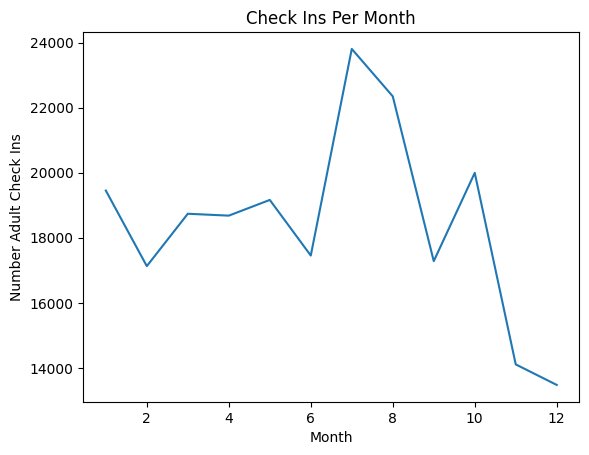

In [20]:
month = hotel_bookings["arrival_date"].dt.month

visits_by_date = hotel_bookings.groupby(month)["adults"].sum()

visits_by_date.plot()
plt.title("Check Ins Per Month")
plt.xlabel('Month')
plt.ylabel('Number Adult Check Ins')
plt.show()



The above graph shows that the most check ins are in the summer months

Frequency Graph

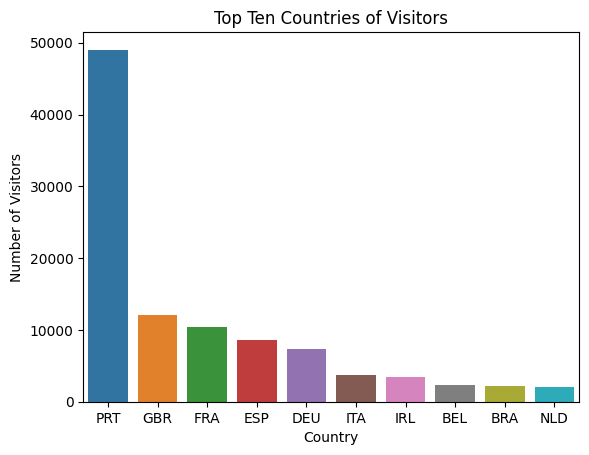

In [87]:
import seaborn as sns

sns.countplot(x="country",data=hotel_bookings, order=hotel_bookings.country.value_counts().iloc[:10].index)

plt.title("Top Ten Countries of Visitors")
plt.xlabel('Country')
plt.ylabel('Number of Visitors')
plt.show()


Above graph shows the top 10 nationalties of the visitors.  This is good, as we can know who to target when advertising.
PRT has the most by far.  This is followed by GBR, FRA, ESP, and DEU.  Then is ITA, IRL.  The lowest three of the top ten are BEL, BRA, and NLD

Boxplot 

To show what meal type percentage

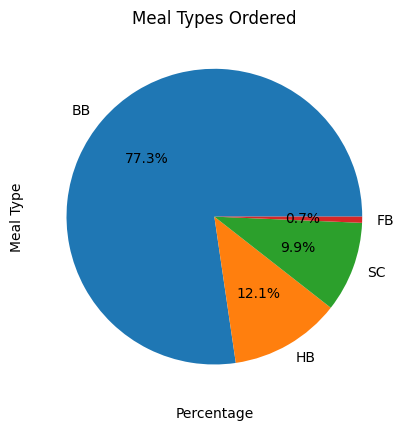

In [108]:
# hotel_meals = np.repeat(hotel_bookings["meal"],freq)
hotel_bookings_meal = hotel_bookings["meal"].value_counts()
hotel_bookings_meal.plot(kind = "pie",autopct='%1.1f%%' )

plt.title("Meal Types Ordered")
plt.xlabel('Percentage')
plt.ylabel('Meal Type')
plt.show()

From above graph we see that 77.3% ordered Bed and breakfast, 12.1% ordered Half board, 9.9% skipped the meal package(SC), and .7% ordered Full board

Scatter Plot

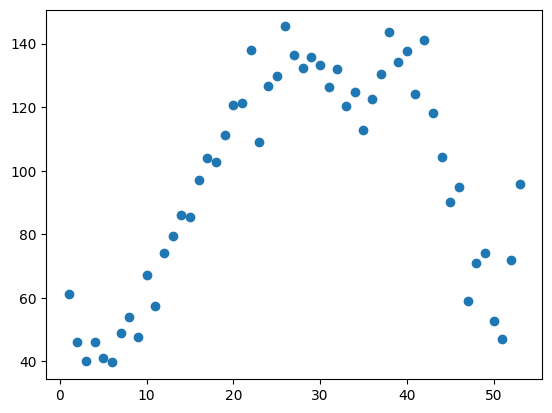

In [159]:
lead_time_week = hotel_bookings.groupby("arrival_date_week_number", as_index=False)["lead_time"].mean()

plt.scatter(lead_time_week["arrival_date_week_number"], lead_time_week["lead_time"])







In [ ]:
Plotgrid

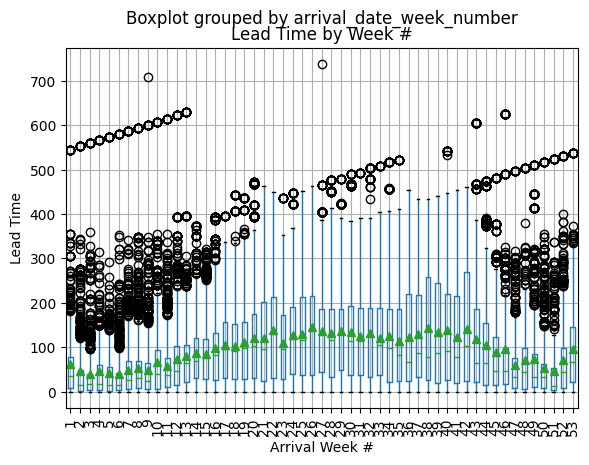

In [171]:
hotel_bookings.boxplot(column= "lead_time", by="arrival_date_week_number", rot=90, showmeans=True )

plt.title("Lead Time by Week #")
plt.xlabel('Arrival Week #')
plt.ylabel('Lead Time')
plt.show()

from above graph we see that the avg lead time is higher in the middle of the year.  Even though the highest lead times are at the beginning/end of the year, the many last minute booking still pull down the mean of those months.  